<a href="https://colab.research.google.com/github/macdet/AppleHardwareTest/blob/master/pagerank_games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a simple "network" that represents a website. 

Make a copy (File -> Save copy in Drive), and feel free to change anything, try different numbers! Nothing can break, in the worst case you can make a new copy later on. Click Runtime -> Run all to try it out.

In [ ]:
# setup
import networkx as nx
import math

# create graph
graph = nx.DiGraph()
graph.add_node("home") # homepage here

This is where we build the site structure. Super-simplified with a homepage, a bunch of main categories, some sub-categories, and a bunch of items within each sub-category. Tweak however you want.

In [ ]:
# build site
for c in range(4): # 4 main categories
  category_name = "cat_%s" % c
  graph.add_node(category_name)
  graph.add_edge("home", category_name)
  graph.add_edge(category_name, "home")
  
  for sc in range(5): # 5 sub-categories per category
    subcat_name = "subcat_%s_%s" % (c, sc)
    graph.add_node(subcat_name)
    graph.add_edge(category_name, subcat_name)
    graph.add_edge(subcat_name, category_name)

    for i in range(10): # 10 items per sub-category
      item_name = "item_%s_%s_%s" % (c, sc, i)
      graph.add_node(item_name)
      graph.add_edge(subcat_name, item_name)
      graph.add_edge(item_name, subcat_name)

      # add breadcrumb to category & home
      graph.add_edge(item_name, category_name) # <-- add a "#" in front to skip breadcrumbs
      graph.add_edge(item_name, "home")        # <-- ditto
      
# we're weird, so let's add some random links
import random
for r in range(20): # <-- set this number to 0 if you don't like random links
  link_from = random.choice(list(graph.nodes()))
  link_to = random.choice(list(graph.nodes()))
  graph.add_edge(link_from, link_to)

Let's calculate PageRank using the [built-in implementation](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html). There are other implementations, and many settings, we're not trying to do rocket science, so this is close enough.

We'll use a log-scale for the PR values since it's easier to work with here. 

In [ ]:
# calculate pagerank
start = {}
start["home"] = 1.0 # most inbound links on homepage

start.update(dict([(k, 0) for k in graph.nodes() if k not in start.keys()])) # fill with rest

# calculate
pr = nx.pagerank(graph, alpha=0.9, personalization=start)
pr_log = dict([(k, 10+math.log(pr[k])) for k in pr.keys()])
print("Raw PR:")
print(pr)
print("Log scale PR:")
print(pr_log)

Raw PR:
{'home': 0.2099616375668611, 'cat_0': 0.06983282994738753, 'subcat_0_0': 0.013768921793619965, 'item_0_0_0': 0.0011267716306206641, 'item_0_0_1': 0.0011267716306206641, 'item_0_0_2': 0.0011267716306206641, 'item_0_0_3': 0.0011267716306206641, 'item_0_0_4': 0.0011267716306206641, 'item_0_0_5': 0.0011267716306206641, 'item_0_0_6': 0.0011267716306206641, 'item_0_0_7': 0.0011267716306206641, 'item_0_0_8': 0.0011267716306206641, 'item_0_0_9': 0.0011267716306206641, 'subcat_0_1': 0.013880872981291845, 'item_0_1_0': 0.0011359382604769323, 'item_0_1_1': 0.0011359382604769323, 'item_0_1_2': 0.0011359382604769323, 'item_0_1_3': 0.0011359382604769323, 'item_0_1_4': 0.0011359382604769323, 'item_0_1_5': 0.0011359382604769323, 'item_0_1_6': 0.0011359382604769323, 'item_0_1_7': 0.0011359382604769323, 'item_0_1_8': 0.0011359382604769323, 'item_0_1_9': 0.0011359382604769323, 'subcat_0_2': 0.013880872981291845, 'item_0_2_0': 0.0011359382604769323, 'item_0_2_1': 0.0011359382604769323, 'item_0_2_2

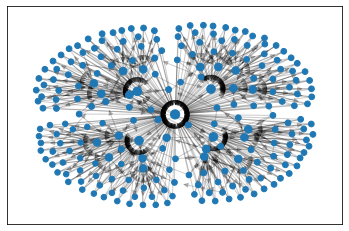

In [ ]:
# draw a picture
import matplotlib.pyplot as plt
pos = nx.kamada_kawai_layout(graph)
nx.draw_networkx_edges(graph, pos, alpha=0.2, arrows=True)
nx.draw_networkx_nodes(graph, pos, nodelist=list(pr_log.keys()), 
                       node_size=[x*10 for x in list(pr_log.values())])
